In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Blurred**

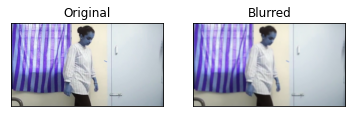

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/NOFALL.jpg')
blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

**Gaussian Blur**

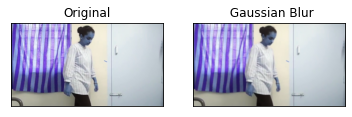

In [ ]:
blur = cv.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title(' Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.show()

**Median Blur**

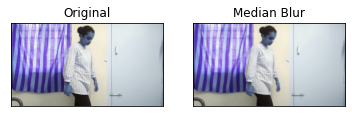

In [ ]:
median = cv.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Median Blur')
plt.xticks([]), plt.yticks([])
plt.show()

**Bilateral Filter**

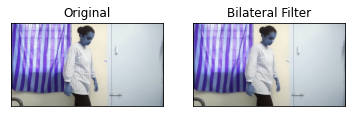

In [ ]:
blur = cv.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Bilateral Filter')
plt.xticks([]), plt.yticks([])
plt.show()

**Image Sharp**

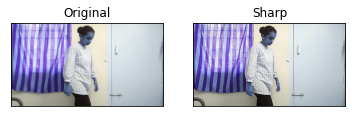

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharp = cv.filter2D(src=img, ddepth=-1, kernel=kernel)
blur = cv.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sharp),plt.title('Sharp')
plt.xticks([]), plt.yticks([])
plt.show()

**Roberts Edge Detection**

In [ ]:
from scipy import ndimage

roberts_cross_v = np.array( [[1, 0 ],
							[0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
							[ -1, 0 ]] )

img = cv.imread("/content/drive/MyDrive/Drive/rgb_0007.png",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edged_img),plt.title('Sharp')
plt.xticks([]), plt.yticks([])
plt.show()



AttributeError: ignored

**Sobel Filter**

In [ ]:
# converting to gray scale

img = cv.imread('/content/drive/MyDrive/Drive/rgb_0007.png',)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gaussian = cv.GaussianBlur(gray,(3,3),0)
# convolute with proper kernels
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)  # x
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

#plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
#plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

error: ignored

**High Pass Filter**

In [ ]:
def highPassFiltering(img,size):#Transfer parameters are Fourier transform spectrogram and filter size
    h, w = img.shape[0:2]#Getting image properties
    h1,w1 = int(h/2), int(w/2)#Find the center point of the Fourier spectrum
    img[h1-int(size/2):h1+int(size/2), w1-int(size/2):w1+int(size/2)] = 0#Center point plus or minus half of the filter size, forming a filter size that defines the size, then set to 0
    return img

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


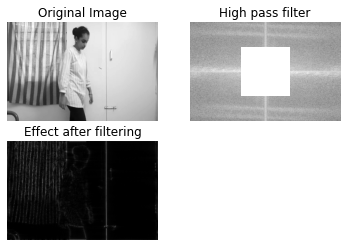

In [ ]:
gray = cv.imread("/content/NOFALL.jpg", 1)
gray = cv.cvtColor(gray, cv.COLOR_BGR2GRAY)
gray = cv.resize(gray, (640, 420))

# Fourier transform
img_dft = np.fft.fft2(gray)
dft_shift = np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle

#High pass filter
dft_shift=highPassFiltering(dft_shift,200)
res = np.log(np.abs(dft_shift))


# Inverse Fourier Transform
idft_shift = np.fft.ifftshift(dft_shift)  #Move the frequency domain from the middle to the upper left corner
ifimg = np.fft.ifft2(idft_shift)  # Fourier library function call
ifimg = np.abs(ifimg)
#cv2.imshow("ifimg",np.int8(ifimg))
#cv2.imshow("gray",gray)


# Draw pictures
plt.subplot(221), plt.imshow(gray, 'gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(222), plt.imshow(res, 'gray'), plt.title('High pass filter')
plt.axis('off')
plt.subplot(223), plt.imshow(np.int8(ifimg), 'gray'), plt.title('Effect after filtering')
plt.axis('off')
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

**Low Pass Filter**

In [ ]:
def lowPassFiltering(img,size):#Transfer parameters are Fourier transform spectrogram and filter size
    h, w = img.shape[0:2]#Getting image properties
    h1,w1 = int(h/2), int(w/2)#Find the center point of the Fourier spectrum
    img2 = np.zeros((h, w), np.uint8)#Define a blank black image with the same size as the Fourier Transform Transfer
    img2[h1-int(size/2):h1+int(size/2), w1-int(size/2):w1+int(size/2)] = 1#Center point plus or minus half of the filter size, forming a filter size that defines the size, then set to 1, preserving the low frequency part
    img3=img2*img #A low-pass filter is obtained by multiplying the defined low-pass filter with the incoming Fourier spectrogram one-to-one.
    return img3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


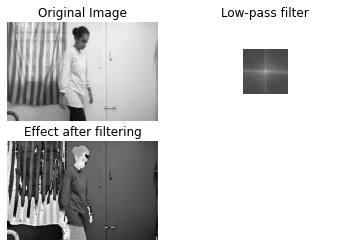

In [ ]:

gray = cv.imread("/content/NOFALL.jpg", 1)
gray = cv.cvtColor(gray, cv.COLOR_BGR2GRAY)
gray = cv.resize(gray, (640, 420))

h,w =gray.shape

for i in range(3000):    #Add 3000 Noise Points
    x = np.random.randint(0, h)
    y = np.random.randint(0, w)
    gray[x,y] = 255

# Fourier transform
img_dft = np.fft.fft2(gray)
dft_shift = np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle

# Low-pass filter
dft_shift = lowPassFiltering(dft_shift, 200)
res = np.log(np.abs(dft_shift))

# Inverse Fourier Transform
idft_shift = np.fft.ifftshift(dft_shift)  # Move the frequency domain from the middle to the upper left corner
ifimg = np.fft.ifft2(idft_shift)  # Fourier library function call
ifimg = np.abs(ifimg)

# Draw pictures
plt.subplot(221), plt.imshow(gray, 'gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(222), plt.imshow(res, 'gray'), plt.title('Low-pass filter')
plt.axis('off')
plt.subplot(223), plt.imshow(np.int8(ifimg), 'gray'), plt.title('Effect after filtering')
plt.axis('off')
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()